In [1]:
#!pip install neuralprophet
#!pip install seaborn
#!pip install -U scikit-learn



In [2]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from neuralprophet import NeuralProphet

from sklearn.metrics import mean_absolute_error

c:\Users\Pepe\anaconda3\envs\neuralprophet\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Pepe\anaconda3\envs\neuralprophet\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [3]:
from neuralprophet import set_random_seed
set_random_seed(0)

In [4]:
import seaborn as sns

sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif','fontname': 'Times New Roman'})

In [5]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  if np.any(y_true==0)==True:
    print('Erro: y_true contêm zeros!')
    return np.inf
  else:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# NEURALPROPHET DIARIO

In [6]:
#cargame los pickle y_test_diario y Y_train_diario
y_test_diario = pd.read_pickle('y_test_diario.pkl')
y_train_diario = pd.read_pickle('y_train_diario.pkl')
#concat los dos dataframes
y_diario = pd.concat([y_train_diario, y_test_diario])

#Pasa mi index a una columna
y_diario.reset_index(level=0, inplace=True)
#llama a la columna inex fecha
y_diario.rename(columns={'index':'fecha'}, inplace=True)

#llama a la columna visitantes totales visitantes
y_diario.rename(columns={'Visitantes totales':'visitantes'}, inplace=True)
y_diario

# Supongamos que 'fecha' es tu columna de fechas y 'visitantes' es tu columna de valores
# Carga tus datos si no los tienes ya en un DataFrame de Pandas
# y_semanal = pd.read_csv('tu_archivo.csv')  # O carga desde el archivo correspondiente

# Asegúrate de que 'fecha' sea de tipo datetime si no lo es
y_diario['fecha'] = pd.to_datetime(y_diario['fecha'])

# Renombra las columnas a 'ds' y 'y'
y_diario.rename(columns={'fecha': 'ds', 'visitantes': 'y'}, inplace=True)

# Muestra las primeras filas para verificar la transformación
print(y_diario.head())
y_diario

          ds     y
0 2013-01-01  2338
1 2013-01-02  9376
2 2013-01-03  9190
3 2013-01-04  9523
4 2013-01-05  5492


,ds,y
0,2013-01-01,2338
1,2013-01-02,9376
2,2013-01-03,9190
3,2013-01-04,9523
4,2013-01-05,5492
...,...,...
1456,2016-12-27,23928
1457,2016-12-28,23960
1458,2016-12-29,24279
1459,2016-12-30,22763


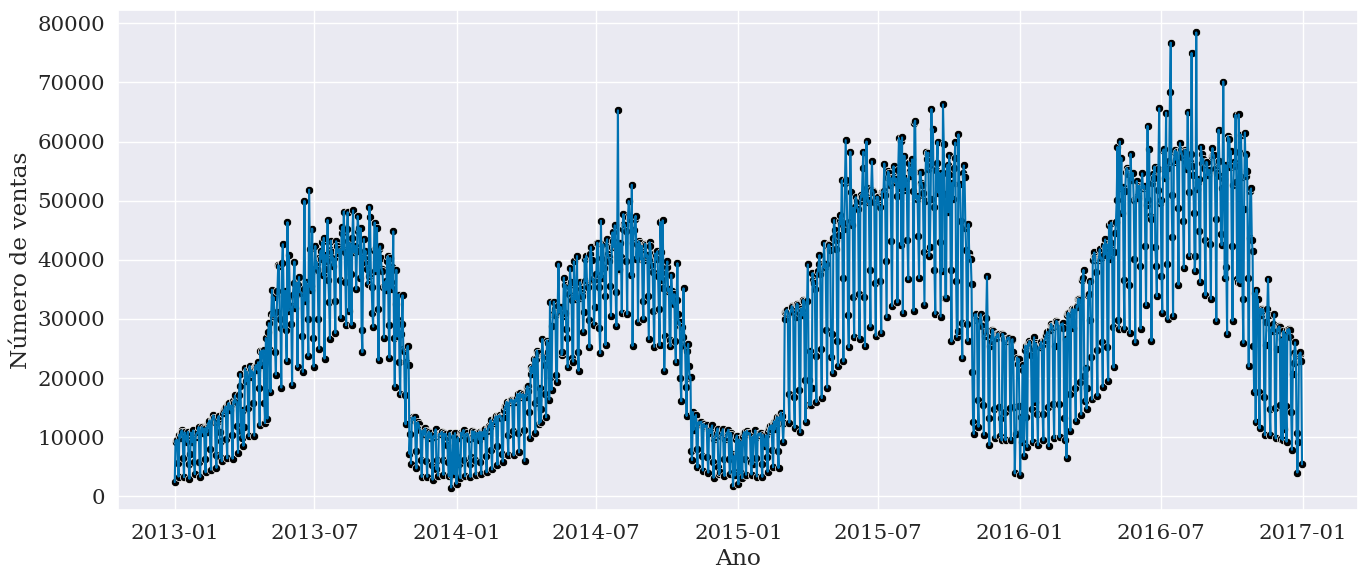

In [7]:
#df.plot(figsize=(10,5), style='.-'); plt.show()

plt.figure(figsize=(16,6.5))
Xlabel='Ano'; Ylabel='Número de ventas'

sns.scatterplot(data=y_diario, x='ds', y='y', color='black')
sns.lineplot(data=y_diario, x='ds', y='y', linewidth=1.5, color='#0072B2', label='')

#plt.legend(loc='lower right')
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.show()

In [8]:
#Separar datos en train y test
N=292; Freq='D'
train = y_diario.drop(y_diario.index[-N:])
test  = y_diario.loc[y_diario.index[-N:]]

print(train.shape, test.shape)
print(train.tail(1),'\n',test.head(1))




(1169, 2) (292, 2)
             ds      y
1168 2016-03-14  32165 
              ds      y
1169 2016-03-15  31955


In [9]:
#Elaboramos el modelo
model =NeuralProphet(
    growth="linear",    # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None,  # list of dates that may include change points (None->automatic)
    n_changepoints=15, # number of potential changepoints to include if changepoints=None
    changepoints_range=0.9, # proportion of history in which trend changepoints will be estimated
    trend_reg=0, # strength of trend regularization (0: no regularization)
    trend_reg_threshold=False, # allowance for trend to change without regularization
    yearly_seasonality=200, # Fourier order for yearly seasonality
    weekly_seasonality="auto", # Fourier order for weekly seasonality
    daily_seasonality="auto", # Fourier order for daily seasonality
    seasonality_mode="additive", # 'additive' or 'multiplicative'
    seasonality_reg=0, # strength of seasonality regularization (0: no regularization)
    n_forecasts=1,
    n_lags=0, # modeificar
    epochs=1000, # number of epochs to train the model
    loss_func="Huber",
    normalize="auto",   # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [10]:
#Entrenamos
metrics = model.fit(train, freq=Freq)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (37) is too small than the required number for the learning rate finder (227). The results might not be optimal.
Finding best initial lr: 100%|██████████| 227/227 [00:00<00:00, 443.59it/s]


Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 5975.69it/s, loss=0.00144, v_num=160, MAE=2.5e+3, RMSE=3.24e+3, Loss=0.00149, RegLoss=0.000]   


In [11]:
# Hacemos la pred de test
future = model.make_future_dataframe(train, periods=len(test), n_historic_predictions=len(train))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.914% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 171.99it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [12]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

y_true = test['y'].values
y_pred = forecast['yhat1'][-292:].values

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE:  {mae:.2f} ventas')
print(f'MAPE: {mape:.4f}%')
print(f'R2 Score: {r2:.4f}')


MAE:  4991.68 ventas
MAPE: 0.1405%
R2 Score: 0.8093


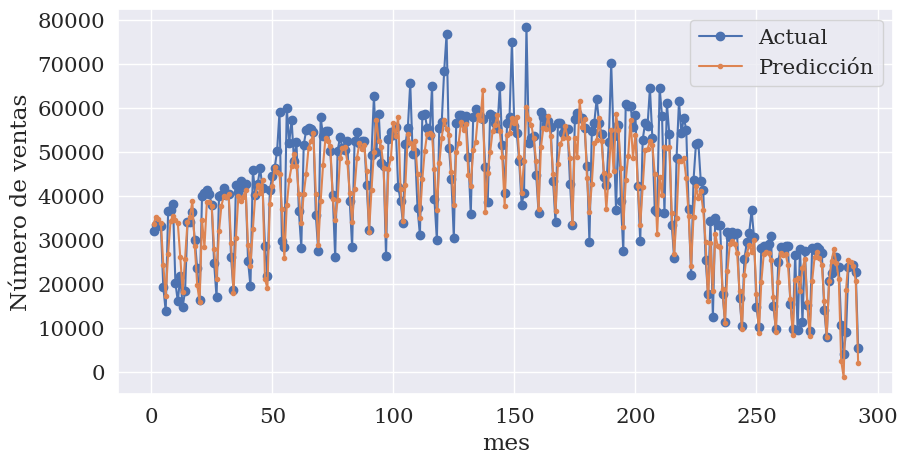

In [13]:
# plot expected vs actual
plt.figure(figsize=(10,5))
x=np.arange(1,len(y_true)+1,1)
plt.plot(x,y_true,'o-', label='Actual')
plt.plot(x,y_pred,'.-', label='Predicción')

plt.ylabel(Ylabel)
plt.xlabel('mes')
plt.legend()
plt.show()

 # Prediccion Enero

In [14]:
#Elaboramos modelo para Enero
model_enero =NeuralProphet(
    growth="linear",    # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None,  # list of dates that may include change points (None->automatic)
    n_changepoints=15,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality=200,
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0, # modeificar
    epochs=50, #  50
    loss_func="Huber",
    normalize="auto",   # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [15]:
#Entrenamos
metrics = model_enero.fit(y_diario, freq=Freq)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (46) is too small than the required number for the learning rate finder (229). The results might not be optimal.
Finding best initial lr: 100%|██████████| 229/229 [00:01<00:00, 228.93it/s]


Epoch 50: 100%|██████████| 50/50 [00:00<00:00, 302.03it/s, loss=0.00217, v_num=161, MAE=3.17e+3, RMSE=4.18e+3, Loss=0.00213, RegLoss=0.000]  


In [16]:
#Creamos dataframe para enero
import pandas as pd

# Crear un rango de fechas para enero de 2017
fechas_enero_2017 = pd.date_range(start='2017-01-01', end='2017-01-31', freq='D')

# Crear un DataFrame con estas fechas
df_prediccion_enero = pd.DataFrame({'ds': fechas_enero_2017})
df_prediccion_enero['y'] = None  # Agregar una columna 'y' vacía o con valores predeterminados



In [17]:
df_prediccion_enero

,ds,y
0,2017-01-01,None
1,2017-01-02,None
2,2017-01-03,None
3,2017-01-04,None
4,2017-01-05,None
5,2017-01-06,None
6,2017-01-07,None
7,2017-01-08,None
8,2017-01-09,None
9,2017-01-10,None


In [26]:
#Prediccion de enero
prediccion_enero = model_enero.predict(df_prediccion_enero)
prediccion_enero


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 442.67it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2017-01-01,None,4126.588379,39275.132812,-22833.816406,-12314.729492
1,2017-01-02,None,27747.201172,39284.710938,-14007.765625,2470.254639
2,2017-01-03,None,28637.191406,39294.292969,-14499.262695,3842.158691
3,2017-01-04,None,30950.189453,39303.875000,-12318.079102,3964.393799
4,2017-01-05,None,22202.966797,39313.453125,-21160.884766,4050.395264
5,2017-01-06,None,24536.720703,39323.035156,-18350.480469,3564.166992
6,2017-01-07,None,20188.982422,39332.613281,-13566.990234,-5576.641602
7,2017-01-08,None,10040.466797,39342.195312,-16987.001953,-12314.729492
8,2017-01-09,None,27024.185547,39351.777344,-14797.846680,2470.254639
9,2017-01-10,None,30703.728516,39361.355469,-12499.786133,3842.158691


In [39]:
#Creame un dataset solo con la columna yhat1
prediccion_enero_solo = prediccion_enero['yhat1']
#G#Guardamelo en un csv llamado predicciones_diaria_enero2017.csv
prediccion_enero_solo.to_csv('predicciones_diaria_enero2017.csv')

In [28]:
#sumame todos los valores 
prediccion_enero.sum()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Pepe\AppData\Local\Temp\ipykernel_27652\1365376638.py:2: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  prediccion_enero.sum()



y                             0
yhat1             749740.901855
trend            1221984.007812
season_yearly    -466240.800781
season_weekly      -6002.322998
dtype: object

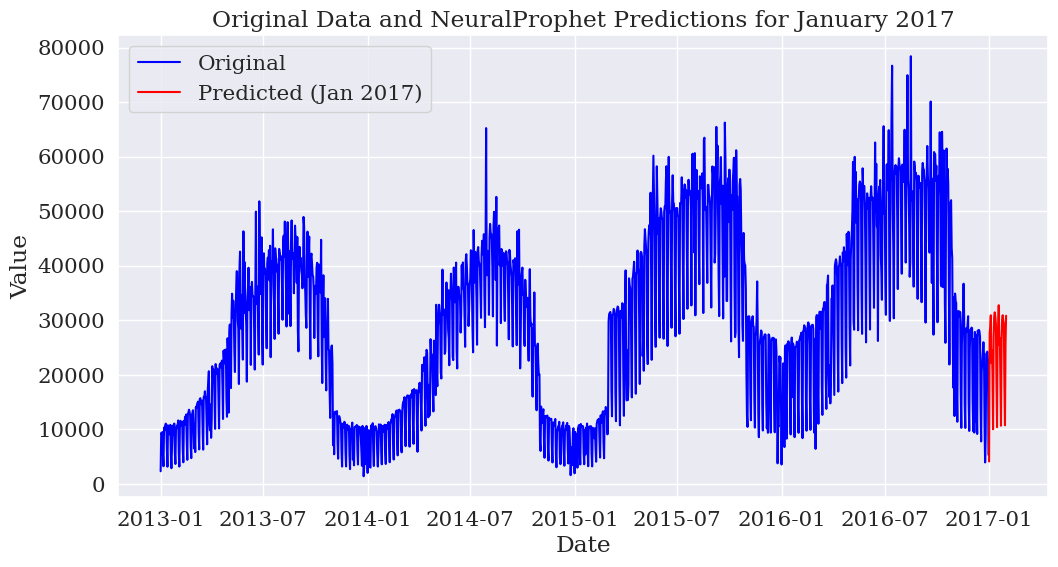

In [29]:
# Concatenar y_diario con las predicciones de enero de 2017
y_diario_predicciones_enero = pd.concat([y_diario, prediccion_enero[['ds', 'yhat1']]])

# Graficar y_diario y las predicciones para enero de 2017
plt.figure(figsize=(12, 6))
plt.plot(y_diario_predicciones_enero['ds'], y_diario_predicciones_enero['y'], label='Original', color='blue')
plt.plot(y_diario_predicciones_enero['ds'], y_diario_predicciones_enero['yhat1'], label='Predicted (Jan 2017)', color='red')

# Configuración del gráfico
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data and NeuralProphet Predictions for January 2017')
plt.legend()
plt.show()

# NEURALPROPHET SEMANAL

In [30]:
#cargame los pickle y_test_semanal y Y_train_semanal
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')
#concat los dos dataframes
df= pd.concat([y_train_semanal, y_test_semanal])
#Pasa mi index a una columna
df.reset_index(level=0, inplace=True)
#llama a la columna inex fecha
df.rename(columns={'index':'fecha'}, inplace=True)

#llama a la columna visitantes totales visitantes
df.rename(columns={'Visitantes totales':'visitantes'}, inplace=True)
df
import pandas as pd

# Supongamos que 'fecha' es tu columna de fechas y 'visitantes' es tu columna de valores
# Carga tus datos si no los tienes ya en un DataFrame de Pandas
# y_semanal = pd.read_csv('tu_archivo.csv')  # O carga desde el archivo correspondiente

# Asegúrate de que 'fecha' sea de tipo datetime si no lo es
df['fecha'] = pd.to_datetime(df['fecha'])

# Renombra las columnas a 'ds' y 'y'
df.rename(columns={'fecha': 'ds', 'visitantes': 'y'}, inplace=True)

# Muestra las primeras filas para verificar la transformación
print(df.head())
#cuentame las filas de df
df.shape

          ds      y
0 2013-01-06  39175
1 2013-01-13  62527
2 2013-01-20  59026
3 2013-01-27  57169
4 2013-02-03  62514


(209, 2)

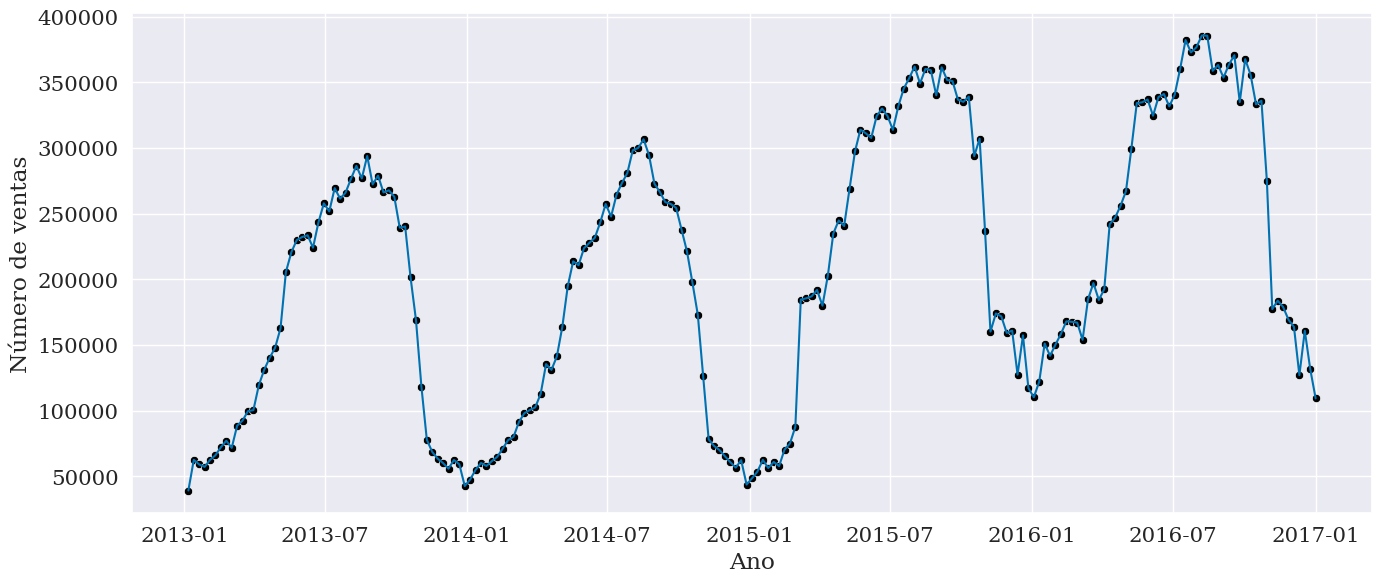

In [31]:
#df.plot(figsize=(10,5), style='.-'); plt.show()

plt.figure(figsize=(16,6.5))
Xlabel='Ano'; Ylabel='Número de ventas'

sns.scatterplot(data=df, x='ds', y='y', color='black')
sns.lineplot(data=df, x='ds', y='y', linewidth=1.5, color='#0072B2', label='')

#plt.legend(loc='lower right')
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.show()

In [50]:
#Separar datos en train y test
N=42; Freq='W'
train = df.drop(df.index[-N:])
test  = df.loc[df.index[-N:]]

print(train.shape, test.shape)
print(train.tail(1),'\n',test.head(1))

(167, 2) (42, 2)
            ds       y
166 2016-03-13  184842 
             ds       y
167 2016-03-20  197137


In [51]:

model =model = NeuralProphet(
    growth="linear",    # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None,  # list of dates that may include change points (None->automatic)
    n_changepoints=15,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0, # modeificar
    epochs=50, #  50
    loss_func="Huber",
    normalize="auto",   # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [52]:
metrics = model.fit(train, freq=Freq)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.401% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (11) is too small than the required number for the learning rate finder (210). The results might not be optimal.
Finding best initial lr: 100%|███

Epoch 50: 100%|██████████| 50/50 [00:00<00:00, 1769.93it/s, loss=0.00135, v_num=165, MAE=1.41e+4, RMSE=1.78e+4, Loss=0.00134, RegLoss=0.000] 


In [53]:
future = model.make_future_dataframe(train, periods=len(test), n_historic_predictions=len(train))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.401% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 99.522% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 399.15it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [54]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

y_true = test['y'].values
y_pred = forecast['yhat1'][-42:].values

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE:  {mae:.2f} ventas')
print(f'MAPE: {mape:.4f}%')
print(f'R2 Score: {r2:.2f}')



MAE:  33932.65 ventas
MAPE: 0.1497%
R2 Score: 0.80


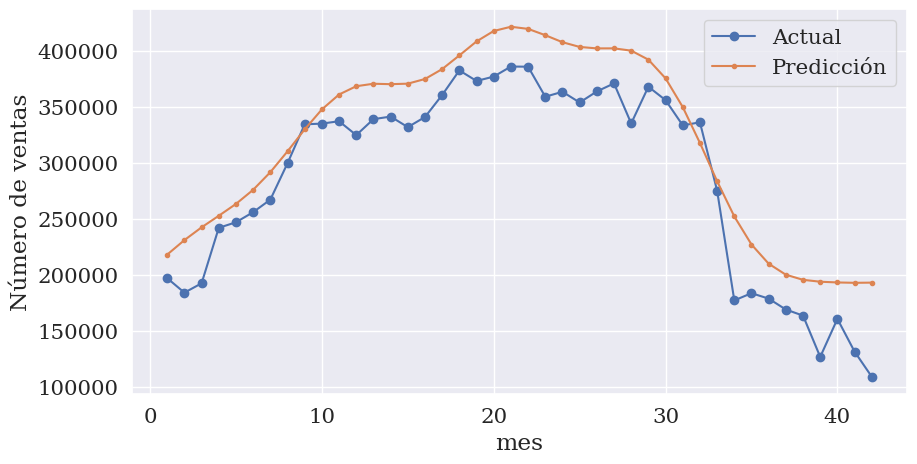

In [55]:
# plot expected vs actual
plt.figure(figsize=(10,5))
x=np.arange(1,len(y_true)+1,1)
plt.plot(x,y_true,'o-', label='Actual')
plt.plot(x,y_pred,'.-', label='Predicción')

plt.ylabel(Ylabel)
plt.xlabel('mes')
plt.legend()
plt.show()